In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [23]:
img_array=cv2.imread("test_dataset/closed_eyes/s0001_00056_0_0_0_0_0_01.png",cv2.IMREAD_GRAYSCALE)

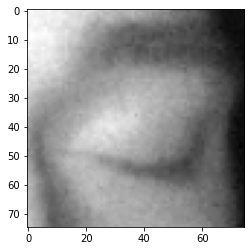

In [24]:
plt.imshow(img_array,cmap="gray")

In [25]:
img_array.shape

(75, 75)

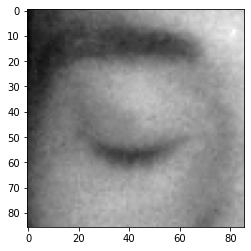

In [26]:


Datadirectory="train_dataset/"
Classes=["closed_eyes","open_eyes"]
for category in Classes:
    path=os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        backtorgb=cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array,cmap="gray")
        plt.show()
        break
        
        
        
    break


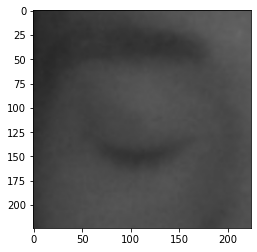

In [27]:
img_size=224
new_array=cv2.resize(backtorgb,(img_size,img_size))
plt.imshow(new_array,cmap="gray")
plt.show()


                

In [28]:


training_Data=[]
def create_training_Data():
    for category in Classes:
        path=os.path.join(Datadirectory,category)
        class_num=Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                backtorgb=cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
                new_array=cv2.resize(backtorgb,(img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                    pass

In [29]:
create_training_Data()

In [22]:
print(len(training_Data))

16972


In [23]:
import random
random.shuffle(training_Data)

In [24]:
X=[]
y=[]
for features,label in training_Data:
    X.append(features)
    y.append(label)
    
X=np.array(X).reshape(-1,img_size,img_size,3)



In [25]:
X.shape

(16972, 224, 224, 3)

In [26]:
X=X/255.0;

In [27]:
Y=np.array(y)

In [12]:
import pickle
pickle_out=open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out=open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

NameError: name 'X' is not defined

In [29]:
pickle_in=open("X.pickle","rb")
X=pickle.load(pickle_in)

pickle_in=open("y.pickle","rb")
y=pickle.load(pickle_in)

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [31]:
model=tf.keras.applications.mobilenet.MobileNet()

In [32]:
base_input=model.layers[0].input


In [33]:
base_output=model.layers[-4].output

In [34]:
Flat_layer=layers.Flatten()(base_output)
final_output=layers.Dense(1)(Flat_layer)
final_output=layers.Activation('sigmoid')(final_output)

In [35]:
new_model=keras.Model(inputs=base_input,outputs=final_output)

In [36]:
new_model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [37]:
new_model.fit(X,Y,epochs=20,validation_split=0.1)

Epoch 1/20
478/478 [==============================] - 1119s 2s/step - loss: 0.0522 - accuracy: 0.9823 - val_loss: 0.0363 - val_accuracy: 0.9876
Epoch 2/20
478/478 [==============================] - 1156s 2s/step - loss: 0.0213 - accuracy: 0.9923 - val_loss: 0.0492 - val_accuracy: 0.9812
Epoch 3/20
478/478 [==============================] - 1109s 2s/step - loss: 0.0142 - accuracy: 0.9954 - val_loss: 0.0115 - val_accuracy: 0.9941
Epoch 4/20
478/478 [==============================] - 1109s 2s/step - loss: 0.0137 - accuracy: 0.9954 - val_loss: 0.1009 - val_accuracy: 0.9741
Epoch 5/20
478/478 [==============================] - 1096s 2s/step - loss: 0.0153 - accuracy: 0.9954 - val_loss: 0.0155 - val_accuracy: 0.9959
Epoch 6/20
478/478 [==============================] - 1054s 2s/step - loss: 0.0108 - accuracy: 0.9965 - val_loss: 0.0187 - val_accuracy: 0.9959
Epoch 7/20
478/478 [==============================] - 1065s 2s/step - loss: 0.0102 - accuracy: 0.9969 - val_loss: 0.0248 - val_accuracy:

ResourceExhaustedError:  OOM when allocating tensor with shape[32,57,57,128] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu
	 [[node model/conv_pad_4/Pad
 (defined at C:\Users\Acer\anaconda3\lib\site-packages\keras\backend.py:3672)
]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_6092]

Errors may have originated from an input operation.
Input Source operations connected to node model/conv_pad_4/Pad:
In[0] model/conv_pw_3_relu/Relu6 (defined at C:\Users\Acer\anaconda3\lib\site-packages\keras\backend.py:4864)	
In[1] model/conv_pad_4/Pad/paddings:

Operation defined at: (most recent call last)
>>>   File "C:\Users\Acer\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
>>>     return _run_code(code, main_globals, None,
>>> 
>>>   File "C:\Users\Acer\anaconda3\lib\runpy.py", line 87, in _run_code
>>>     exec(code, run_globals)
>>> 
>>>   File "C:\Users\Acer\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
>>>     app.launch_new_instance()
>>> 
>>>   File "C:\Users\Acer\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
>>>     app.start()
>>> 
>>>   File "C:\Users\Acer\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
>>>     self.io_loop.start()
>>> 
>>>   File "C:\Users\Acer\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
>>>     self.asyncio_loop.run_forever()
>>> 
>>>   File "C:\Users\Acer\anaconda3\lib\asyncio\base_events.py", line 596, in run_forever
>>>     self._run_once()
>>> 
>>>   File "C:\Users\Acer\anaconda3\lib\asyncio\base_events.py", line 1890, in _run_once
>>>     handle._run()
>>> 
>>>   File "C:\Users\Acer\anaconda3\lib\asyncio\events.py", line 80, in _run
>>>     self._context.run(self._callback, *self._args)
>>> 
>>>   File "C:\Users\Acer\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 457, in dispatch_queue
>>>     await self.process_one()
>>> 
>>>   File "C:\Users\Acer\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 446, in process_one
>>>     await dispatch(*args)
>>> 
>>>   File "C:\Users\Acer\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 353, in dispatch_shell
>>>     await result
>>> 
>>>   File "C:\Users\Acer\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 648, in execute_request
>>>     reply_content = await reply_content
>>> 
>>>   File "C:\Users\Acer\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 353, in do_execute
>>>     res = shell.run_cell(code, store_history=store_history, silent=silent)
>>> 
>>>   File "C:\Users\Acer\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
>>>     return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
>>> 
>>>   File "C:\Users\Acer\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2901, in run_cell
>>>     result = self._run_cell(
>>> 
>>>   File "C:\Users\Acer\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2947, in _run_cell
>>>     return runner(coro)
>>> 
>>>   File "C:\Users\Acer\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
>>>     coro.send(None)
>>> 
>>>   File "C:\Users\Acer\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3172, in run_cell_async
>>>     has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
>>> 
>>>   File "C:\Users\Acer\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3364, in run_ast_nodes
>>>     if (await self.run_code(code, result,  async_=asy)):
>>> 
>>>   File "C:\Users\Acer\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_code
>>>     exec(code_obj, self.user_global_ns, self.user_ns)
>>> 
>>>   File "C:\Users\Acer\AppData\Local\Temp/ipykernel_12976/3101424286.py", line 1, in <module>
>>>     new_model.fit(X,Y,epochs=20,validation_split=0.1)
>>> 
>>>   File "C:\Users\Acer\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "C:\Users\Acer\anaconda3\lib\site-packages\keras\engine\training.py", line 1216, in fit
>>>     tmp_logs = self.train_function(iterator)
>>> 
>>>   File "C:\Users\Acer\anaconda3\lib\site-packages\keras\engine\training.py", line 878, in train_function
>>>     return step_function(self, iterator)
>>> 
>>>   File "C:\Users\Acer\anaconda3\lib\site-packages\keras\engine\training.py", line 867, in step_function
>>>     outputs = model.distribute_strategy.run(run_step, args=(data,))
>>> 
>>>   File "C:\Users\Acer\anaconda3\lib\site-packages\keras\engine\training.py", line 860, in run_step
>>>     outputs = model.train_step(data)
>>> 
>>>   File "C:\Users\Acer\anaconda3\lib\site-packages\keras\engine\training.py", line 808, in train_step
>>>     y_pred = self(x, training=True)
>>> 
>>>   File "C:\Users\Acer\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "C:\Users\Acer\anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1083, in __call__
>>>     outputs = call_fn(inputs, *args, **kwargs)
>>> 
>>>   File "C:\Users\Acer\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "C:\Users\Acer\anaconda3\lib\site-packages\keras\engine\functional.py", line 451, in call
>>>     return self._run_internal_graph(
>>> 
>>>   File "C:\Users\Acer\anaconda3\lib\site-packages\keras\engine\functional.py", line 589, in _run_internal_graph
>>>     outputs = node.layer(*args, **kwargs)
>>> 
>>>   File "C:\Users\Acer\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "C:\Users\Acer\anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1083, in __call__
>>>     outputs = call_fn(inputs, *args, **kwargs)
>>> 
>>>   File "C:\Users\Acer\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "C:\Users\Acer\anaconda3\lib\site-packages\keras\layers\convolutional.py", line 3233, in call
>>>     return backend.spatial_2d_padding(
>>> 
>>>   File "C:\Users\Acer\anaconda3\lib\site-packages\keras\backend.py", line 3672, in spatial_2d_padding
>>>     return tf.compat.v1.pad(x, pattern)
>>> 

In [3]:
new_model.save('my_model_20ep.h5')

NameError: name 'new_model' is not defined

In [2]:
new_model=tf.keras.models.load_model('my_model_20ep.h5')

In [3]:
img_array=cv2.imread('s0012_04591_0_0_1_1_1_03.png',cv2.IMREAD_GRAYSCALE)
backtorgb=cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
new_array=cv2.resize(backtorgb,(img_size,img_size))

NameError: name 'img_size' is not defined

In [32]:
X_input=np.array(new_array).reshape(1,img_size,img_size,3)
X_input.shape

(1, 224, 224, 3)

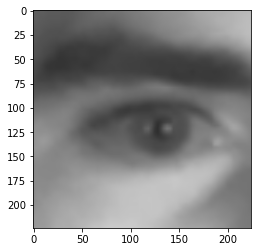

In [33]:
plt.imshow(new_array)

In [34]:
prediction=new_model.predict(X_input/255.0)

In [35]:
prediction
norm_predict =  float('{:f}'.format(prediction[0][0]))
print(norm_predict)



1.0


In [36]:
X_input.shape

(1, 224, 224, 3)

In [4]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [5]:
img=cv2.imread('color1.jpg')


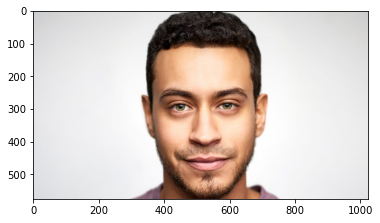

In [6]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [7]:
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

In [8]:
eye_cascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_eye.xml')

In [9]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [10]:
eyes=eye_cascade.detectMultiScale(gray,1.1,4)

In [11]:
for(x,y,w,h) in eyes:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

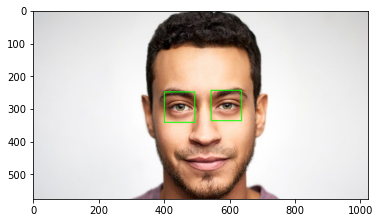

In [12]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [13]:
eye_cascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_eye.xml')
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
eyes=eye_cascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in eyes:
    roi_gray=gray[y:y+h, x:x+w]
    roi_color=img[y:y+h, x:x+w]
    eyess=eye_cascade.detectMultiScale(roi_gray)
    if len(eyess)==0:
        print("eyes not detected")
    else:
        for (ex,ey,ew,eh) in eyess:
                eyes_roi=roi_color[ey:ey+eh, ex:ex+ew]
     
        
        

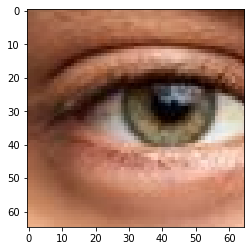

In [14]:
plt.imshow(cv2.cvtColor(eyes_roi,cv2.COLOR_BGR2RGB))

In [19]:
eyes_roi.shape


(65, 65, 3)

In [20]:
final_image=cv2.resize(eyes_roi,(224,224))
final_image=np.expand_dims(final_image,axis=0)
final_image=final_image/255.0

In [21]:
final_image.shape

(1, 224, 224, 3)

In [22]:
new_model.predict(final_image)

array([[0.94411755]], dtype=float32)

In [23]:
import cv2
path="haarcascade_frontalface_default.xml"
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(0)
  
if not cap.isOpened():
        raise IOError("cannot open webcam")
    
while True:
    ret,frame=cap.read()
    eye_cascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_eye.xml')
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    eyes=eye_cascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in eyes:
        roi_gray=gray[y:y+h, x:x+w]
        roi_color=frame[y:y+h, x:x+w]
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
        eyess=eye_cascade.detectMultiScale(roi_gray)
        if len(eyess)==0:
            print("eyes not detected")
        else:
              for (ex,ey,ew,eh) in eyess:
                eyes_roi= roi_color[ey:ey+eh, ex:ex+ew]
                
    final_image=cv2.resize(eyes_roi,(224,224))
    final_image=np.expand_dims(final_image,axis=0)
    final_image=final_image/255.0
    
    Predictions=new_model.predict(final_image)
    if(Predictions>0.25):
        status="open eyes"
    else:
        status="closed eyes"
        
            
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    print(faceCascade.empty())
    faces=faceCascade.detectMultiScale(gray,1.1,4)
    
    
    for(x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)   
        
        
    font=cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(frame,
                status,
                (50,50),
                font,3,
                (0,0,255),
                2,
                cv2.LINE_4)
    
    cv2.imshow('Drowsiness Detection',frame)
     
    if cv2.waitKey(2)& 0xFF ==ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()



False
False
False
eyes not detected
False
False
eyes not detected
False
eyes not detected
False
False
False
False
eyes not detected
False
False
False
False
False
False
eyes not detected
False
False
False
False
eyes not detected
False
False
False
False
False
False
eyes not detected
False
False
False
False
False
False
False
eyes not detected
False
False
False
eyes not detected
False
False
False
False
False
False
False
eyes not detected
eyes not detected
False
False
eyes not detected
False
eyes not detected
False
False
eyes not detected
eyes not detected
False
eyes not detected
False
eyes not detected
eyes not detected
False
eyes not detected
False
False
eyes not detected
False
False
eyes not detected
False
False
False
eyes not detected
False
eyes not detected
False
eyes not detected
False
eyes not detected
False
False
eyes not detected
False
eyes not detected
False
eyes not detected
eyes not detected
False
eyes not detected
False
eyes not detected
eyes not detected
False
eyes not detecte

In [22]:

import winsound
frequency=2500
duration=1000
import numpy as np
import cv2

path="haarcascade_frontalface_default.xml"
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("cannot open webcam")
        
counter =0

def lip_distance(shape):
    
    return distance

predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat') 
detector = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
YAWN_THRESH = 20

while True:
    ret,frame=cap.read()
    eye_cascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_eye_tree_eyeglasses.xml')
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY) 
    eyes=eye_cascade.detectMultiScale(gray,1.1,4)
    rects = detector.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30),flags=cv2.CASCADE_SCALE_IMAGE)
    
    
            
    for x,y,w,h in eyes:
        roi_gray=gray[y:y+h, x:x+w]
        roi_color=frame[y:y+h, x:x+w]
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
        eyess=eye_cascade.detectMultiScale(roi_gray)
        if len(eyess)==0:
            print("eyes not detected")
            
            
            
        else:
            for (ex,ey,ew,eh) in eyess:
                eyes_roi= roi_color[ey:ey+eh, ex:ex+ew]
                
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    print(faceCascade.empty())
    faces=faceCascade.detectMultiScale(gray,1.1,4)
    
    if(len(faces)!=0):
    
        for(x,y,w,h) in faces:
            cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)   


        font=cv2.FONT_HERSHEY_SIMPLEX

        final_image=cv2.resize(eyes_roi,(224,224))
        final_image=np.expand_dims(final_image,axis=0)
        final_image=final_image/255.0

        Predictions=new_model.predict(final_image)
        if(Predictions>0.75 and len(eyess)!=0):
            counter=0
            status="open eyes"
            cv2.putText(frame,
                        status,
                        (100,100),
                         font,3,
                        (0,255,0),
                        2,
                        cv2.LINE_4)
            x1,y1,w1,h1=0,0,175,75
            cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1) 
            cv2.putText(frame,'Active',(x1 + int(w1/10),y1 + int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,255,0),2)

        else:
            
            counter=counter+1
            status="closed eyes"
            cv2.putText(frame,status,(100,100),font,3,(0,0,255),2,cv2.LINE_4)
            cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255),2)
            if counter>4:
                        x1,y1,w1,h1=0,0,175,75
                        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
                        cv2.putText(frame,'sleep alert!!',(x1+int(w1/10),y1+ int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,255,0),2)
                        winsound.Beep(frequency,duration)
                        counter=0

        
        
        
    for(x, y, w, h) in rects:
        rect = dlib.rectangle(int(x), int(y), int(x + w),int(y + h))
        shape = predictor(gray, rect)
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)
        top_lip = shape[50:53]
        top_lip = np.concatenate((top_lip, shape[61:64]))
        low_lip = shape[56:59]
        low_lip = np.concatenate((low_lip, shape[65:68]))

        top_mean = np.mean(top_lip, axis=0)
        low_mean = np.mean(low_lip, axis=0)

        distance = abs(top_mean[1] - low_mean[1])
        lip = shape[48:60]
        cv2.drawContours(frame, [lip], -1, (0, 255, 0), 1)

        if (distance > YAWN_THRESH):
                cv2.putText(frame, "Yawn Alert", (10, 100),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
                #winsound.Beep(frequency,duration)
                
        else:
            cv2.putText(frame, "YAWN: {:.2f}".format(distance), (300, 25),
            cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
    cv2.imshow('Drowsiness detection',frame)
    if cv2.waitKey(2)&0xFF==ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()
        

                

    


        

                

    



False


TypeError: int() can't convert non-string with explicit base

In [23]:
cap.release()